Epoch 1/12
469/469 [==============================] - 50s 106ms/step - loss: 0.2248 - accuracy: 0.9310 - val_loss: 0.0528 - val_accuracy: 0.9841
Epoch 2/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0821 - accuracy: 0.9760 - val_loss: 0.0376 - val_accuracy: 0.9880
Epoch 3/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0624 - accuracy: 0.9816 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 4/12
469/469 [==============================] - 50s 106ms/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.0361 - val_accuracy: 0.9882
Epoch 5/12
469/469 [==============================] - 50s 106ms/step - loss: 0.0477 - accuracy: 0.9861 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 6/12
469/469 [==============================] - 50s 106ms/step - loss: 0.0450 - accuracy: 0.9874 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 7/12
469/469 [==============================] - 50s 106ms/step - loss: 0.0442 - accuracy: 0.9873 - val_loss: 0.0302 - val_ac

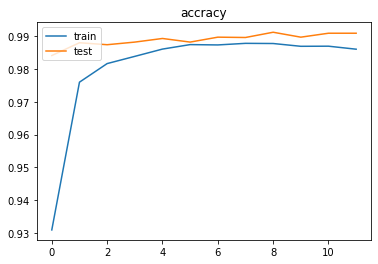

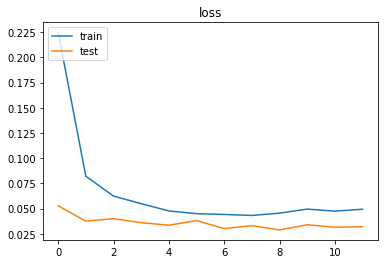

In [5]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D
from keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

hist = model.fit(x_train, y_train, epochs=12, batch_size=128, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()